# Problem Statement

Using the transaction dataset, identify the annual salary for each customer

Exploring correlations between annual salary and various customer attributes (e.g. age). Visualising interesting correlations using a scatter plot.

To Build a simple regression model to predict the annual salary for each customer using the attributes identified above, building a decision-tree based model to predict salary, testing its performance.

# Work Flow

1. Loading the data
2. Feature Engineering
3. Data Splitting
4. Data Modeling
5. Data Evaluation

# Loading the data

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data directory
import os
import pickle

PICKLE_DATA_DIR = os.path.join("..", "cleaned_data", "procesed_data.pkl")
data = pd.read_pickle(PICKLE_DATA_DIR)
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,Wednesday,August
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,Wednesday,August
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,Wednesday,August
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,Wednesday,August
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,Wednesday,August


In [3]:
data.shape

(12043, 21)

# Feature Engineering

**Missing Values**

In [4]:
# checking for missing values in the data
data.isnull().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
customer_id          0
merchant_long_lat    0
movement             0
weekday              0
month_name           0
dtype: int64

In [5]:
data.describe()

,card_present_flag,balance,age,amount
count,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.873536,14704.195553,30.582330,187.933588
std,0.332385,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


**Categorical Variables**

In [6]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['status',
 'account',
 'long_lat',
 'txn_description',
 'merchant_id',
 'first_name',
 'gender',
 'merchant_suburb',
 'merchant_state',
 'extraction',
 'transaction_id',
 'customer_id',
 'merchant_long_lat',
 'movement',
 'weekday',
 'month_name']

In [7]:
for feature in categorical_features:
    print(feature,':',len(data[feature].unique()))

status : 2
account : 100
long_lat : 100
txn_description : 6
merchant_id : 5726
first_name : 80
gender : 2
merchant_suburb : 1610
merchant_state : 9
extraction : 9442
transaction_id : 12043
customer_id : 100
merchant_long_lat : 2704
movement : 2
weekday : 7
month_name : 3


In [8]:
data.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'weekday', 'month_name'],
      dtype='object')

Since, we need to build a model to predict the annual salary for each customer. Lets look at the types of transactions.

In [9]:
data.txn_description.unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [10]:
# for predicting the annual salary we will concentrate on pay/salary of the transactions feature

salaries = data[data['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean()

In [11]:
salaries.columns

Index(['card_present_flag', 'balance', 'age', 'amount'], dtype='object')

In [12]:
salaries.head()

,card_present_flag,balance,age,amount
customer_id,,,,
CUS-1005756958,1.0,4718.665385,53.0,970.47
CUS-1117979751,1.0,11957.202857,21.0,3578.65
CUS-1140341822,1.0,5841.720000,28.0,1916.51
CUS-1147642491,1.0,8813.467692,34.0,1711.39
CUS-1196156254,1.0,23845.717143,34.0,3903.73


In [13]:
df =[]
for id in data['customer_id']:
    df.append(salaries.loc[id]['amount'].mean())
data['avg_salary'] = df
data['annual_salary'] = 12*data['avg_salary']

In [14]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name,avg_salary,annual_salary
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,Wednesday,August,1013.67,12164.04
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,Wednesday,August,1013.67,12164.04
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,Wednesday,August,1002.13,12025.56
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,Wednesday,August,892.09,10705.08
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,Wednesday,August,1013.67,12164.04


In [15]:
data.shape

(12043, 23)

In [16]:
pred_sal = data[data['txn_description'] == 'PAY/SALARY']
pred_sal.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name,avg_salary,annual_salary
50,posted,1.0,ACC-588564840,151.27 -33.76,PAY/SALARY,Missing,Isaiah,8342.11,2018-08-01,M,...,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,Missing,credit,Wednesday,August,3903.95,46847.40
61,posted,1.0,ACC-1650504218,145.01 -37.93,PAY/SALARY,Missing,Marissa,2040.58,2018-08-01,F,...,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,Missing,credit,Wednesday,August,1626.48,19517.76
64,posted,1.0,ACC-3326339947,151.18 -33.80,PAY/SALARY,Missing,Eric,3158.51,2018-08-01,M,...,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,Missing,credit,Wednesday,August,983.36,11800.32
68,posted,1.0,ACC-3541460373,145.00 -37.83,PAY/SALARY,Missing,Jeffrey,2517.66,2018-08-01,M,...,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,Missing,credit,Wednesday,August,1408.08,16896.96
70,posted,1.0,ACC-2776252858,144.95 -37.76,PAY/SALARY,Missing,Kristin,2271.79,2018-08-01,F,...,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,Missing,credit,Wednesday,August,1068.04,12816.48


In [17]:
pred_sal.shape

(883, 23)

In [18]:
# encoding the features
from sklearn.preprocessing import LabelEncoder

# label encoding
encoder = LabelEncoder()

for features in categorical_features:
    pred_sal[features] = encoder.fit_transform(pred_sal[features])

<ipython-input-18-43e4f7d8688c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_sal[features] = encoder.fit_transform(pred_sal[features])


In [19]:
pred_sal.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name,avg_salary,annual_salary
50,0,1.0,89,86,0,0,30,8342.11,2018-08-01,1,...,0,3903.95,528,13,0,0,4,0,3903.95,46847.40
61,0,1.0,19,41,0,0,48,2040.58,2018-08-01,0,...,1,1626.48,83,47,0,0,4,0,1626.48,19517.76
64,0,1.0,63,82,0,0,26,3158.51,2018-08-01,1,...,1,983.36,650,70,0,0,4,0,983.36,11800.32
68,0,1.0,68,40,0,0,33,2517.66,2018-08-01,1,...,2,1408.08,49,12,0,0,4,0,1408.08,16896.96
70,0,1.0,50,33,0,0,41,2271.79,2018-08-01,0,...,2,1068.04,833,83,0,0,4,0,1068.04,12816.48


In [20]:
pred_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 50 to 12004
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             883 non-null    int32         
 1   card_present_flag  883 non-null    float64       
 2   account            883 non-null    int32         
 3   long_lat           883 non-null    int32         
 4   txn_description    883 non-null    int32         
 5   merchant_id        883 non-null    int32         
 6   first_name         883 non-null    int32         
 7   balance            883 non-null    float64       
 8   date               883 non-null    datetime64[ns]
 9   gender             883 non-null    int32         
 10  age                883 non-null    int64         
 11  merchant_suburb    883 non-null    int32         
 12  merchant_state     883 non-null    int32         
 13  extraction         883 non-null    int32         
 14  amount 

In [21]:
x = pred_sal.drop('annual_salary',axis = 1)
y = pred_sal['annual_salary']

**Correlation**

In [22]:
x.corr()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,gender,age,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name,avg_salary
status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_present_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account,NaN,NaN,1.000000,0.003878,NaN,NaN,-0.019548,0.053642,0.035255,0.058014,...,NaN,-0.009955,-0.059800,-0.035921,-0.002612,NaN,NaN,-0.160125,-0.005625,-0.059800
long_lat,NaN,NaN,0.003878,1.000000,NaN,NaN,0.028120,-0.088536,0.149609,0.031335,...,NaN,-0.006264,-0.083109,-0.028837,0.024006,NaN,NaN,-0.052519,0.005792,-0.083109
txn_description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,NaN,NaN,-0.019548,0.028120,NaN,NaN,1.000000,-0.034784,-0.118985,0.029333,...,NaN,0.006431,-0.086808,0.005670,-0.081570,NaN,NaN,0.001659,0.003193,-0.086808
balance,NaN,NaN,0.053642,-0.088536,NaN,NaN,-0.034784,1.000000,0.138691,0.194956,...,NaN,0.097389,0.287501,0.041730,0.065959,NaN,NaN,-0.161711,0.051479,0.287501
gender,NaN,NaN,0.035255,0.149609,NaN,NaN,-0.118985,0.138691,1.000000,0.031567,...,NaN,-0.004378,0.181306,-0.005828,0.024773,NaN,NaN,-0.037365,0.001871,0.181306
age,NaN,NaN,0.058014,0.031335,NaN,NaN,0.029333,0.194956,0.031567,1.000000,...,NaN,-0.003434,-0.138594,-0.044524,-0.227648,NaN,NaN,-0.063549,-0.000640,-0.138594


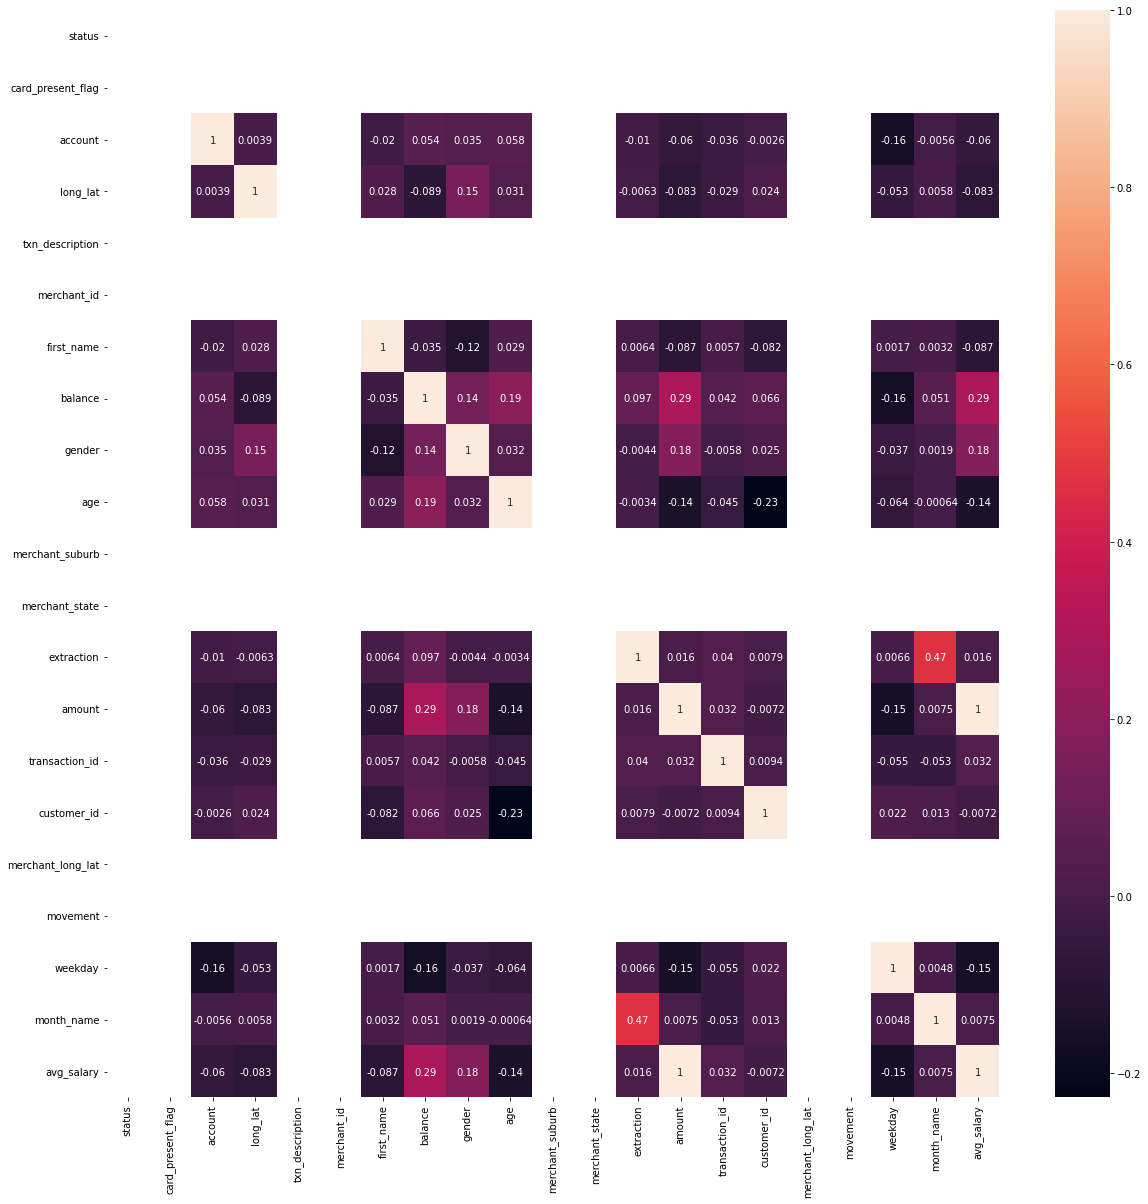

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(), annot=True)
plt.show()

In [24]:
# lets remove the highly correlated features
threshold = 0.5

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [25]:
correlation(x,threshold)

{'avg_salary'}

In [26]:
x.drop('avg_salary', axis=1, inplace=True)

In [27]:
x.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'weekday', 'month_name'],
      dtype='object')

In [28]:
# removing the features which are not important 
x.drop(['status', 'card_present_flag', 'txn_description', 'merchant_id', 'merchant_suburb', 'merchant_state', 
            'merchant_long_lat', 'movement', 'date'], axis=1, inplace=True)

In [29]:
x.head()

,account,long_lat,first_name,balance,gender,age,extraction,amount,transaction_id,customer_id,weekday,month_name
50,89,86,30,8342.11,1,23,0,3903.95,528,13,4,0
61,19,41,48,2040.58,0,23,1,1626.48,83,47,4,0
64,63,82,26,3158.51,1,22,1,983.36,650,70,4,0
68,68,40,33,2517.66,1,24,2,1408.08,49,12,4,0
70,50,33,41,2271.79,0,43,2,1068.04,833,83,4,0


In [30]:
y.head()

50    46847.40
61    19517.76
64    11800.32
68    16896.96
70    12816.48
Name: annual_salary, dtype: float64

# Data Splitting

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [32]:
print(x.shape, x_train.shape, x_test.shape)

(883, 12) (618, 12) (265, 12)


# Linear Regression

**Model Building**

In [33]:
# loading the Linear Regression Model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(x_train,y_train)

In [34]:
# Prediction on training data
train_data_pred = linear_model.predict(x_train)

In [35]:
# R squared Value for trainig data
from sklearn import metrics

R_sq_train = metrics.r2_score(y_train, train_data_pred)
print(R_sq_train)

1.0


**Model Evaluation**

In [36]:
# Prediction on test data
test_data_pred = linear_model.predict(x_test)

In [37]:
# R squared Value for test data
R_sq_test = metrics.r2_score(y_test, test_data_pred)
print(R_sq_test)

1.0


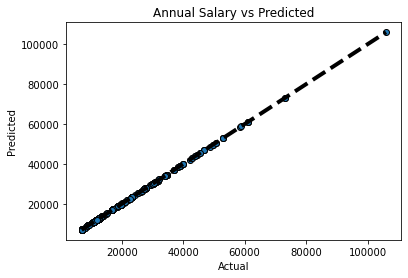

In [38]:
# Plot of predicted salary against actual salary
fig, ax = plt.subplots()
ax.scatter(y_test, test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [39]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": test_data_pred})
results.head(10)

,Actual,Predicted
9335,21703.44,21703.44
7322,73286.76,73286.76
8012,7973.16,7973.16
4254,52863.60,52863.60
10297,7155.96,7155.96
5764,27388.32,27388.32
6284,42211.32,42211.32
72,12164.04,12164.04
8570,6912.00,6912.00
10829,34638.24,34638.24


In [40]:
print("Coefficient of determination : ", metrics.r2_score(y_test, test_data_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, test_data_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, test_data_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, test_data_pred))

Coefficient of determination :  1.0
Mean Squared Error :  1.0329925132650423e-21
Root Mean Squared Error :  3.2140200890240905e-11
Mean Absolute Error :  1.606545169433614e-11


**Interpretation**

- From the R-squared value, we observe that our Linear Regression model is absolutely accurate to 100%.
- As the mean square error, Root mean sqaure error values are close to 0, which indicates that the Linear Regression model is peforming good in predicting the anual salary.
- The Mean absolute error value is close to zero depecting that our Linear Regression model is very good in predicting. 

# Decision Tree Regressor

**Model Building**

In [41]:
# Loading decision tree Model
from sklearn.tree import DecisionTreeRegressor

# loading the Model
tree_model = DecisionTreeRegressor().fit(x_train,y_train)

In [42]:
# Prediction on training data
tree_train_pred = tree_model.predict(x_train)

In [43]:
# R squared Value for trainig data

tree_R2_train = metrics.r2_score(y_train, tree_train_pred)
print(tree_R2_train)

1.0


**Model Evaluation**

In [44]:
# Prediction on test data
tree_test_pred = tree_model.predict(x_test)

In [45]:
# R squared Value for test data

tree_R2_test = metrics.r2_score(y_test, tree_test_pred)
print(tree_R2_test)

0.9999525920748582


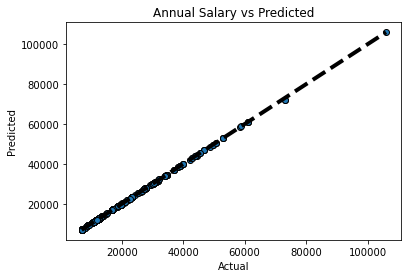

In [46]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, tree_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [47]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": tree_test_pred})
results.head(10)

,Actual,Predicted
9335,21703.44,21703.44
7322,73286.76,72293.88
8012,7973.16,7973.16
4254,52863.60,52863.60
10297,7155.96,7155.96
5764,27388.32,27388.32
6284,42211.32,42211.32
72,12164.04,12164.04
8570,6912.00,6912.00
10829,34638.24,34638.24


In [48]:
print("Coefficient of determination : ", metrics.r2_score(y_test, tree_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, tree_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, tree_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, tree_test_pred))

Coefficient of determination :  0.9999525920748582
Mean Squared Error :  9600.245089811164
Root Mean Squared Error :  97.98084042204968
Mean Absolute Error :  10.34852830188746


**Interpretation**
- From the R-squared value, we observe that our Decision Tree Regressor model is accurate to 99%.
- As the mean square error, Root mean sqaure error & mean absolute error values are far greater than 0, which indicates that the Decision Tree Regressor model is no good in predicting the anual salary.

# Support Vector Machine Regressor

**Model Building**

In [49]:
# Loading Support Vector Machine Model
from sklearn import svm

SVM_model = svm.SVR(kernel='linear').fit(x_train,y_train)

In [50]:
# Prediction on training data
SVM_train_data_pred = SVM_model.predict(x_train)

In [51]:
# R squared Value for trainig data
SVM_R_sq_train = metrics.r2_score(y_train, SVM_train_data_pred)
print(SVM_R_sq_train)

0.9998914499951903


**Model Evaluation**

In [52]:
# Prediction on test data
SVM_test_data_pred = SVM_model.predict(x_test)

In [53]:
# R squared Value for test data
SVM_R_sq_test = metrics.r2_score(y_test, SVM_test_data_pred)
print(SVM_R_sq_test)

0.9999239883171139


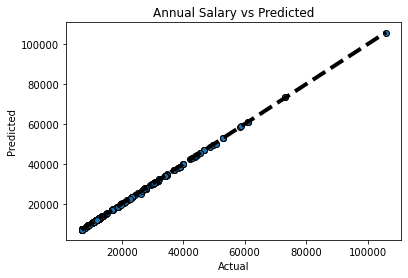

In [54]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, SVM_test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [55]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": SVM_test_data_pred})
results.head(10)

,Actual,Predicted
9335,21703.44,21706.302216
7322,73286.76,73353.086303
8012,7973.16,7844.297332
4254,52863.60,52875.877518
10297,7155.96,7134.388112
5764,27388.32,27321.920701
6284,42211.32,42255.924404
72,12164.04,12130.615660
8570,6912.00,6911.542878
10829,34638.24,34634.816105


In [56]:
print("Coefficient of determination : ", metrics.r2_score(y_test, SVM_test_data_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, SVM_test_data_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, SVM_test_data_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, SVM_test_data_pred))

Coefficient of determination :  0.9999239883171139
Mean Squared Error :  15392.590652549134
Root Mean Squared Error :  124.06687975664228
Mean Absolute Error :  54.97532534747644


**Interpretation**
- From the R-squared value, we observe that our SVM Regressor model is accurate to 99%.
- As the mean square error, Root mean sqaure error  & Mean absolute error values are not close to 0, which indicates that the SVM Regressor model is not good in predicting the anual salary.

# KNN Regressor

**Model Building**

In [57]:
# Loading KNN Model
from sklearn.neighbors import KNeighborsRegressor

# loading the Model
KNN_model = KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)

# R squared Value for trainig data
KNN_train_pred = KNN_model.predict(x_train)
KNN_R2_train = metrics.r2_score(y_train, KNN_train_pred)
print(KNN_R2_train)

0.8652377581419165


In [58]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15]}]
search = GridSearchCV(KNN_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.3s finished


In [59]:
# optimum parameter values
search.best_params_

{'n_neighbors': 3}

In [60]:
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(x_train,y_train)

In [61]:
# R squared Value for trainig data

KNN_train_pred = KNN_model.predict(x_train)
KNN_R2_train = metrics.r2_score(y_train, KNN_train_pred)
print(KNN_R2_train)

0.9249042704494366


**Model Evaluation**

In [62]:
# Prediction on test data
KNN_test_pred = KNN_model.predict(x_test)

In [63]:
# R squared Value for test data

KNN_R2_test = metrics.r2_score(y_test, KNN_test_pred)
print(KNN_R2_test)

0.9195863097280396


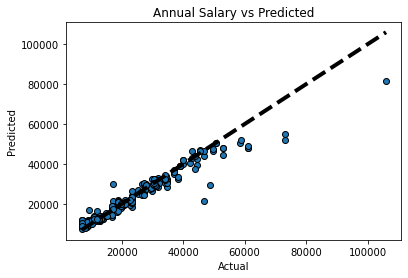

In [64]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, KNN_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [65]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": KNN_test_pred})
results.head(10)

,Actual,Predicted
9335,21703.44,20585.96
7322,73286.76,55007.92
8012,7973.16,7973.16
4254,52863.60,44578.32
10297,7155.96,8331.92
5764,27388.32,30131.88
6284,42211.32,40282.44
72,12164.04,11947.88
8570,6912.00,7509.28
10829,34638.24,28602.92


In [66]:
print("Coefficient of determination : ", metrics.r2_score(y_test, KNN_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, KNN_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, KNN_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, KNN_test_pred))

Coefficient of determination :  0.9195863097280396
Mean Squared Error :  16284010.170819622
Root Mean Squared Error :  4035.34511173699
Mean Absolute Error :  2105.2824150943393


**Interpretation**
- From the R-squared value, we observe that our KNN Regressor model is accurate to 92%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the KNN Regressor model is not good in predicting the anual salary.

# Random Forest Regressor

**Model Building**

In [67]:
# Loading random forest Model
from sklearn.ensemble import RandomForestRegressor

# loading the Model
rf_model = RandomForestRegressor(n_estimators=500, max_features='sqrt').fit(x_train,y_train)

# R squared Value for trainig data
rf_train_pred = rf_model.predict(x_train)
rf_R2_train = metrics.r2_score(y_train, rf_train_pred)
print(rf_R2_train)

0.99596221345893


In [68]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_estimators':[100,200,300,400,500,600]}]
search = GridSearchCV(rf_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   14.8s finished


In [69]:
# optimum parameter values
search.best_params_

{'n_estimators': 200}

In [70]:
rf_model = RandomForestRegressor(n_estimators=200, max_features='sqrt').fit(x_train,y_train)

In [71]:
# R squared Value for trainig data

rf_train_pred = rf_model.predict(x_train)
rf_R2_train = metrics.r2_score(y_train, rf_train_pred)
print(rf_R2_train)

0.9955940016659439


**Model Evaluation**

In [72]:
# Prediction on test data
rf_test_pred = rf_model.predict(x_test)

In [73]:
# R squared Value for test data

rf_R2_test = metrics.r2_score(y_test, rf_test_pred)
print(rf_R2_test)

0.9583004894192593


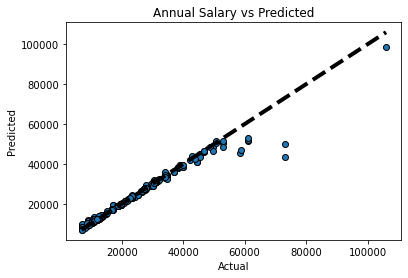

In [74]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, rf_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [75]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": rf_test_pred})
results.head(10)

,Actual,Predicted
9335,21703.44,22016.7894
7322,73286.76,43426.6680
8012,7973.16,8144.9448
4254,52863.60,50524.4532
10297,7155.96,8030.3448
5764,27388.32,27110.6880
6284,42211.32,41785.7526
72,12164.04,12248.8674
8570,6912.00,6997.7922
10829,34638.24,34428.3402


In [76]:
print("Coefficient of determination : ", metrics.r2_score(y_test, rf_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, rf_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, rf_test_pred))

Coefficient of determination :  0.9583004894192593
Mean Squared Error :  8444274.253780346
Root Mean Squared Error :  2905.9033455674926
Mean Absolute Error :  956.870868679239


**Interpretation**
- From the R-squared value, we observe that our Random Forest model is accurate to 96%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the Random Forest model is not good in predicting the anual salary.

# Bagging

**Model Building**

In [77]:
# loading the Bagging Model
bag_model = RandomForestRegressor(n_estimators=500, max_features=None).fit(x_train,y_train)

# R squared Value for trainig data
bag_train_pred = bag_model.predict(x_train)
bag_R2_train = metrics.r2_score(y_train, bag_train_pred)
print(bag_R2_train)

0.9996636028865963


In [78]:
# hyperparameter tuning
parameters = [{'n_estimators':[100,200,300,400,500,600]}]
search = GridSearchCV(bag_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.6s finished


In [79]:
# optimum parameter values
search.best_params_

{'n_estimators': 100}

In [80]:
bag_model = RandomForestRegressor(n_estimators=100, max_features=None).fit(x_train,y_train)

In [81]:
# R squared Value for trainig data

bag_train_pred = bag_model.predict(x_train)
bag_R2_train = metrics.r2_score(y_train, bag_train_pred)
print(bag_R2_train)

0.9997455592804939


**Model Evaluation**

In [82]:
# Prediction on test data
bag_test_pred = bag_model.predict(x_test)

In [83]:
# R squared Value for test data

bag_R2_test = metrics.r2_score(y_test, bag_test_pred)
print(bag_R2_test)

0.9997516314955905


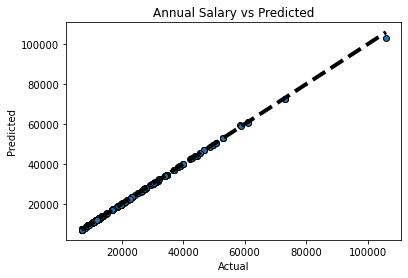

In [84]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, bag_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [85]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": bag_test_pred})
results.head(10)

,Actual,Predicted
9335,21703.44,21686.2404
7322,73286.76,72641.2716
8012,7973.16,7973.1600
4254,52863.60,52914.4956
10297,7155.96,7155.9600
5764,27388.32,27387.8400
6284,42211.32,42225.9696
72,12164.04,12164.0400
8570,6912.00,6916.8792
10829,34638.24,34621.8252


In [86]:
print("Coefficient of determination : ", metrics.r2_score(y_test, bag_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, bag_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, bag_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, bag_test_pred))

Coefficient of determination :  0.9997516314955905
Mean Squared Error :  50295.35690049612
Root Mean Squared Error :  224.26626340244783
Mean Absolute Error :  38.46440150943729


**Interpretation**
- From the R-squared value, we observe that our Bagging model is accurate to 99%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the Bagging model is not good in predicting the anual salary.

# Comparison

Decreasing order of R-square values are depicted as:

- Linear Reression - 1.0
- SVM Regressor - 0.9999
- Decision Tree Regressor - 0.9999
- Bagging - 0.9997
- Random Forest Regressor - 0.9583
- KNN Regressor - 0.9196

The results are highly clear that only Linear Regression model model is good in predicting the annual salary. For the remaining models, even though the R-squared score is good but the MSE, RMSE & MAE vcalues are not getting close to 0, which implies these models are not good at predicting the annual salary.

# Building a predective system

In [89]:
# input data -> (account: 68, long_lat: 40, first_name: 33, balance: 2517.66, gender: 1, age: 24, extraction: 2, 
#                amount: 1408.08, transaction_id: 49, customer_id: 12, weekday: 4, month_name: 0)
# output -> 16896.96

input_data = (68, 40, 33, 2517.66, 1, 24, 2, 1408.08, 49, 12, 4, 0)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [90]:
prediction = linear_model.predict(input_data_reshape)
print(prediction)

[16896.96]


In [91]:
# input data -> (account: 19, long_lat: 41, first_name: 48, balance: 2040.58, gender: 0, age: 23, extraction: 1, 
#                amount: 1626.48, transaction_id: 83, customer_id: 47, weekday: 4, month_name: 0)
# utput -> 19517.76

input_data = (19, 41, 48, 2040.58, 0, 23, 1, 1626.48, 83, 47, 4, 0)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [92]:
prediction = linear_model.predict(input_data_reshape)
print(prediction)

[19517.76]
